In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
my_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', my_path)
sys.path.insert(0,my_path)

Mounted at /content/drive


In [2]:
import pandas as pd

In [ ]:
ppcd_df = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/ppcd_df.csv',encoding='cp949',index_col=0)

/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
real_last_pay = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1013/real_last_pay.csv',encoding='cp949',index_col=0)

In [ ]:
ppcd_df_15 = ppcd_df[ppcd_df['구매일자'] > 20150000]
ppcd_df_14 = ppcd_df[ppcd_df['구매일자'] < 20150000]

quter_1 = ppcd_df_14[ppcd_df_14['구매일자'] < 20140700]
quter_2 = ppcd_df_14[ppcd_df_14['구매일자'] > 20140700]
quter_3 = ppcd_df_15[ppcd_df_15['구매일자'] < 20150700]
quter_4 = ppcd_df_15[ppcd_df_15['구매일자'] > 20150700]

In [ ]:
quter_cat1 = quter_1.groupby(['고객번호','대분류명'])[['구매금액']].sum().reset_index().rename(columns={'구매금액':'구매금액_1'})
quter_cat2 = quter_2.groupby(['고객번호','대분류명'])[['구매금액']].sum().reset_index().rename(columns={'구매금액':'구매금액_2'})
quter_cat3 = quter_3.groupby(['고객번호','대분류명'])[['구매금액']].sum().reset_index().rename(columns={'구매금액':'구매금액_3'})
quter_cat4 = quter_4.groupby(['고객번호','대분류명'])[['구매금액']].sum().reset_index().rename(columns={'구매금액':'구매금액_4'})

In [ ]:
quter_fin = quter_cat2.merge(quter_cat1,how='left',on=['고객번호','대분류명'])
quter_fin = quter_fin.merge(quter_cat3,how='left',on=['고객번호','대분류명'])
quter_fin = quter_fin.merge(quter_cat4,how='left',on=['고객번호','대분류명'])
quter_fin = quter_fin[['고객번호','대분류명','구매금액_1','구매금액_2','구매금액_3','구매금액_4']]

In [ ]:
quter_fin = quter_fin.fillna(0)
quter_fin[['구매금액_1','구매금액_2','구매금액_3','구매금액_4']] = quter_fin[['구매금액_1','구매금액_2','구매금액_3','구매금액_4']].astype(int)

In [ ]:
lis = ['가구/가전/전자기기', '기타', '생활/건강', '식품', '의류/잡화', '반려/취미/문구/도서', '스포츠/레저/자동차', '출산유아동']
for z in lis:
  for i in range(1,5):
    quter_fin[f'{z}_{i}'] = quter_fin[quter_fin['대분류명'] == f'{z}'][[f'구매금액_{i}']]

In [ ]:
result_df = quter_fin.groupby(['고객번호'])[['가구/가전/전자기기_1',
       '가구/가전/전자기기_2', '가구/가전/전자기기_3', '가구/가전/전자기기_4', '기타_1', '기타_2', '기타_3',
       '기타_4', '생활/건강_1', '생활/건강_2', '생활/건강_3', '생활/건강_4', '식품_1', '식품_2',
       '식품_3', '식품_4', '의류/잡화_1', '의류/잡화_2', '의류/잡화_3', '의류/잡화_4',
       '반려/취미/문구/도서_1', '반려/취미/문구/도서_2', '반려/취미/문구/도서_3', '반려/취미/문구/도서_4',
       '스포츠/레저/자동차_1', '스포츠/레저/자동차_2', '스포츠/레저/자동차_3', '스포츠/레저/자동차_4',
       '출산유아동_1', '출산유아동_2', '출산유아동_3', '출산유아동_4']].sum().reset_index().astype(int)

In [ ]:
#result_df.to_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1013/real_last_cat_pay.csv',encoding='cp949')

In [ ]:
quter_num1 = quter_1.groupby(['고객번호'])[['영수증번호']].count().reset_index().rename(columns={'영수증번호':'방문횟수_1'})
quter_num2 = quter_2.groupby(['고객번호'])[['영수증번호']].count().reset_index().rename(columns={'영수증번호':'방문횟수_2'})
quter_num3 = quter_3.groupby(['고객번호'])[['영수증번호']].count().reset_index().rename(columns={'영수증번호':'방문횟수_3'})
quter_num4 = quter_4.groupby(['고객번호'])[['영수증번호']].count().reset_index().rename(columns={'영수증번호':'방문횟수_4'})

In [ ]:
quter_count = quter_num1.merge(quter_num2,how='left',on='고객번호')
quter_count = quter_count.merge(quter_num3,how='left',on='고객번호')
quter_count = quter_count.merge(quter_num4,how='left',on='고객번호')
quter_count = quter_count[['고객번호','방문횟수_1','방문횟수_2','방문횟수_3','방문횟수_4']].fillna(0).astype(int)

In [ ]:
#quter_count.to_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1013/real_last_count.csv',encoding='cp949')

In [ ]:
fault = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1012/incheol_1013.csv',encoding='cp949',index_col=0)

In [ ]:
payments = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1013/분기별제휴사별_구매금액.csv',encoding='cp949',index_col=0)

In [ ]:
fault = fault[['고객번호','성별','연령대']]

In [ ]:
use_mcat = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1013/기수별이용한중분류개수.csv',encoding='cp949',index_col=0)

In [ ]:
result = fault.merge(real_last_pay,how='left',on='고객번호')
result = result.merge(payments,how='left',on='고객번호')
result = result.merge(result_df,how='left',on='고객번호')
result = result.merge(quter_count,how='left',on='고객번호')
result = result.merge(use_mcat,how='left',on='고객번호')


In [ ]:
result = result.fillna(0).astype(int)

In [ ]:
result

,고객번호,성별,연령대,구매금액_1,구매금액_2,구매금액_3,구매금액_4,구매금액_1_A,구매금액_1_B,구매금액_1_C,구매금액_1_D,구매금액_2_A,구매금액_2_B,구매금액_2_C,구매금액_2_D,구매금액_3_A,구매금액_3_B,구매금액_3_C,구매금액_3_D,구매금액_4_A,구매금액_4_B,구매금액_4_C,구매금액_4_D,가구/가전/전자기기_1,가구/가전/전자기기_2,가구/가전/전자기기_3,가구/가전/전자기기_4,기타_1,기타_2,기타_3,기타_4,생활/건강_1,생활/건강_2,생활/건강_3,생활/건강_4,식품_1,식품_2,식품_3,식품_4,의류/잡화_1,의류/잡화_2,의류/잡화_3,의류/잡화_4,반려/취미/문구/도서_1,반려/취미/문구/도서_2,반려/취미/문구/도서_3,반려/취미/문구/도서_4,스포츠/레저/자동차_1,스포츠/레저/자동차_2,스포츠/레저/자동차_3,스포츠/레저/자동차_4,출산유아동_1,출산유아동_2,출산유아동_3,출산유아동_4,방문횟수_1,방문횟수_2,방문횟수_3,방문횟수_4,1_중분류갯수,2_중분류갯수,3_중분류갯수,4_중분류갯수
0,1,1,5,19925355,34116312,17898365,13102518,19703210,21800,200345,0,33340300,376140,399872,0,17382750,208136,307479,0,12800890,184900,116728,0,177650,13832340,868250,1937750,1711450,1189900,600500,182600,519620,3582100,523360,712460,4747205,3080192,2901785,1091038,10448770,12431780,12404490,8794020,0,0,0,0,0,0,0,0,0,0,0,0,238,356,312,151,21,34,29,23
1,2,1,5,24323230,21922100,27791610,25843820,24292730,30500,0,0,21875650,46450,0,0,27486650,132500,0,172460,25799820,0,0,44000,1952400,727000,1959120,3672560,7457460,4159400,7343410,6041740,1204460,3441370,2312730,1302430,5354030,3679770,2843730,3086330,3908240,7057720,9785910,9962600,30500,30000,84800,0,3949760,2716170,2422820,1706260,466380,110670,1039090,71900,339,271,261,245,19,23,26,21
2,3,1,5,851215,1042554,592280,679118,80000,0,771215,0,0,6960,1035594,0,0,0,592280,0,0,0,679118,0,0,26900,0,2300,0,0,0,0,10980,109920,54020,56250,748265,905734,538260,608768,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,348,391,220,232,21,22,16,23
3,4,0,5,5042106,4257510,3656937,3737257,4628260,80060,333786,0,3711520,420740,125250,0,3170780,333864,152293,0,2764050,759402,213805,0,0,404000,0,73700,33250,575750,205400,0,161500,242260,129880,134300,1613886,861810,1804827,1479057,2826170,1542440,1385830,1829680,0,0,0,0,402100,613350,62000,220520,0,17900,69000,0,270,172,263,225,24,29,27,24
4,5,1,5,5460150,2225730,2934930,2616260,5444150,16000,0,0,2225730,0,0,0,2917380,0,0,17550,2586960,0,0,29300,49900,212300,0,0,897310,223800,477850,90000,415330,57050,5750,100290,3296060,1426380,1988930,1698920,664270,235000,462400,727050,0,0,0,0,63080,71200,0,0,0,0,0,0,377,130,123,89,18,14,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19142,19356,0,3,170160,1536090,2104968,2434587,0,0,170160,0,29000,17200,1489890,0,0,0,2104968,0,211900,0,2222687,0,0,16000,5490,0,0,48900,10960,36110,3990,117530,262930,303740,166170,1347890,1791588,1894337,0,2970,28000,141400,0,0,0,0,0,2800,0,59000,0,0,0,0,47,381,434,416,13,28,27,27
19143,19357,0,3,91950,3281346,3044944,2246675,52700,39250,0,0,1052250,2223486,5610,0,823900,2206144,14900,0,344000,1902675,0,0,0,13750,4600,9900,0,125900,139000,114200,0,112980,137260,31180,48950,1775896,1973334,1469635,43000,848050,581900,308090,0,29280,21250,108370,0,35490,4100,65700,0,340000,183500,139600,12,425,453,342,9,37,34,32
19144,19359,1,4,43190,1286327,837240,1092380,0,0,43190,0,0,0,1286327,0,0,4450,832790,0,0,0,1092380,0,0,0,0,0,0,0,0,0,50,93310,100850,57240,43140,1191027,725920,1020170,0,1990,0,2990,0,0,0,0,0,0,0,0,0,0,0,0,17,534,412,369,7,23,22,19
19145,19360,0,3,368050,2060040,1412140,886060,0,0,0,368050,10300,58610,0,1991130,290100,0,0,1122040,334600,0,0,551460,0,3050,0,0,244700,1258850,789040,303950,39600,293960,70150,88200,83750,471280,290850,154480,0,13000,187400,334600,0,0,0,0,0,19900,68700,4830,0,0,0,0,41,271,152,80,11,25,21,16


In [ ]:
#result.to_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1013/final_dataset.csv',encoding='cp949')

In [ ]:
def dp(data):
  if data < 0:
    result = 1
  elif data > 0:
    result = 0
  else :
    result = '문제발생'
  return result

In [ ]:
result['구매변동_1-2'] = (result['구매금액_2'] - result['구매금액_1']).apply(lambda x: dp(x))
result['구매변동_2-3'] = (result['구매금액_3'] - result['구매금액_2']).apply(lambda x: dp(x))
result['구매변동_1-3'] = (result['구매금액_3'] - result['구매금액_1']).apply(lambda x: dp(x))
result['구매변동_1-4'] = (result['구매금액_4'] - result['구매금액_1']).apply(lambda x: dp(x))
result['구매변동_3-4'] = (result['구매금액_4'] - result['구매금액_3']).apply(lambda x: dp(x))

In [ ]:
gap_df = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1013/15등급_gap.csv',encoding='cp949',index_col=0)

In [ ]:
new_gap_df = gap_df.merge(result[['고객번호','구매변동_1-2','구매변동_2-3','구매변동_1-3','구매변동_1-4','구매변동_3-4']],how='left',on='고객번호')

In [ ]:
new_gap_df

,고객번호,성별,연령대,구매금액_1P,구매금액_2P,구매금액_1_3P,구매금액_1P_A,구매금액_2P_A,구매금액_1_3P_A,구매금액_1P_B,구매금액_2P_B,구매금액_1_3P_B,구매금액_1P_C,구매금액_2P_C,구매금액_1_3P_C,구매금액_1P_D,구매금액_2P_D,구매금액_1_3P_D,가구/가전/전자기기_1P,가구/가전/전자기기_2P,가구/가전/전자기기_1_3P,기타_1P,기타_2P,기타_1_3P,생활/건강_1P,생활/건강_2P,생활/건강_1_3P,식품_1P,식품_2P,식품_1_3P,의류/잡화_1P,의류/잡화_2P,의류/잡화_1_3P,반려/취미/문구/도서_1P,반려/취미/문구/도서_2P,반려/취미/문구/도서_1_3P,스포츠/레저/자동차_1P,스포츠/레저/자동차_2P,스포츠/레저/자동차_1_3P,출산유아동_1P,출산유아동_2P,출산유아동_1_3P,방문횟수_1P,방문횟수_2P,방문횟수_1_3P,중분류갯수_1P,중분류갯수_2P,중분류갯수_1_3P,구매변동_1-2,구매변동_2-3,구매변동_1-3,구매변동_1-4,구매변동_3-4
0,1,1,5,0,0,0,0,0,0,1,-1,0,5,-3,2,0,0,0,5,0,5,0,-2,-2,3,-3,0,-5,0,-5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,1,1,1
1,2,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,14,14,0,0,0,0,0,0,0,0,0,-4,-2,-6,0,0,0,0,5,5,0,0,0,-10,11,1,-1,0,-1,1,0,1,1,0,0,0,1
2,3,1,5,1,-1,0,-1,0,-1,1,-1,0,0,0,0,0,0,0,2,-2,0,0,0,0,2,-1,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-3,-2,0,-1,-1,0,1,1,1,0
3,4,0,5,-1,-1,-2,-1,-1,-2,1,0,1,-5,0,-5,0,0,0,14,-14,0,10,-7,3,2,-3,-1,-2,2,0,-6,-1,-7,0,0,0,4,-11,-7,1,1,2,-1,1,0,1,-1,0,1,1,1,1,0
4,5,1,5,-3,1,-2,-5,1,-4,-1,0,-1,0,0,0,0,3,3,8,-11,-3,-9,4,-5,-7,-1,-8,-5,2,-3,-2,1,-1,0,0,0,0,-2,-2,0,0,0,-4,0,-4,0,-1,-1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19142,19356,0,3,1,1,2,1,-1,0,1,-1,0,9,0,9,0,0,0,1,0,1,1,0,1,2,3,5,3,1,4,1,0,1,0,0,0,1,-1,0,0,0,0,5,0,5,3,-1,2,0,0,0,0,0
19143,19357,0,3,3,0,3,1,0,1,8,0,8,1,0,1,0,0,0,1,0,1,3,0,3,3,0,3,4,1,5,4,-2,2,3,-1,2,1,0,1,10,-5,5,5,1,6,4,-1,3,0,1,0,0,1
19144,19359,1,4,1,-1,0,0,0,0,0,1,1,12,0,12,0,0,0,0,0,0,0,0,0,1,1,2,3,-2,1,1,-1,0,0,0,0,0,0,0,0,0,0,7,-2,5,2,0,2,0,1,0,0,0
19145,19360,0,3,2,-1,1,1,0,1,1,-1,0,0,0,0,0,0,0,1,-1,0,9,0,9,6,-5,1,1,-1,0,1,0,1,0,0,0,1,1,2,0,0,0,3,-1,2,2,0,2,0,1,0,0,1


In [ ]:
new_gap_df.columns

Index(['고객번호', '성별', '연령대', '구매금액_1P', '구매금액_2P', '구매금액_1_3P', '구매금액_1P_A',
       '구매금액_2P_A', '구매금액_1_3P_A', '구매금액_1P_B', '구매금액_2P_B', '구매금액_1_3P_B',
       '구매금액_1P_C', '구매금액_2P_C', '구매금액_1_3P_C', '구매금액_1P_D', '구매금액_2P_D',
       '구매금액_1_3P_D', '가구/가전/전자기기_1P', '가구/가전/전자기기_2P', '가구/가전/전자기기_1_3P',
       '기타_1P', '기타_2P', '기타_1_3P', '생활/건강_1P', '생활/건강_2P', '생활/건강_1_3P',
       '식품_1P', '식품_2P', '식품_1_3P', '의류/잡화_1P', '의류/잡화_2P', '의류/잡화_1_3P',
       '반려/취미/문구/도서_1P', '반려/취미/문구/도서_2P', '반려/취미/문구/도서_1_3P', '스포츠/레저/자동차_1P',
       '스포츠/레저/자동차_2P', '스포츠/레저/자동차_1_3P', '출산유아동_1P', '출산유아동_2P',
       '출산유아동_1_3P', '방문횟수_1P', '방문횟수_2P', '방문횟수_1_3P', '중분류갯수_1P', '중분류갯수_2P',
       '중분류갯수_1_3P', '구매변동_1-2', '구매변동_2-3', '구매변동_1-3', '구매변동_1-4'],
      dtype='object')

In [ ]:
new_gap_df.to_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1013/new_gap.csv',encoding='cp949')

In [ ]:
train_df = new_gap_df[['성별', '연령대', '구매금액_1P', '구매금액_1P_A',
       '구매금액_1P_B',
       '구매금액_1P_C', '구매금액_1P_D',
       '가구/가전/전자기기_1P',
       '기타_1P', '생활/건강_1P',
       '식품_1P', '의류/잡화_1P',
       '반려/취미/문구/도서_1P', '스포츠/레저/자동차_1P',
       '출산유아동_1P',
       '방문횟수_1P', '중분류갯수_1P',
       '구매변동_1-2', '구매변동_1-3']]

In [ ]:
train_df

,성별,연령대,구매금액_1P,구매금액_1P_A,구매금액_1P_B,구매금액_1P_C,구매금액_1P_D,가구/가전/전자기기_1P,기타_1P,생활/건강_1P,식품_1P,의류/잡화_1P,반려/취미/문구/도서_1P,스포츠/레저/자동차_1P,출산유아동_1P,방문횟수_1P,중분류갯수_1P,구매변동_1-2,구매변동_1-3
0,1,5,0,0,1,5,0,5,0,3,-5,0,0,0,0,1,1,0,1
1,1,5,0,0,0,0,0,0,0,0,-4,0,0,0,-10,-1,1,1,0
2,1,5,1,-1,1,0,0,2,0,2,1,0,0,0,0,1,0,0,1
3,0,5,-1,-1,1,-5,0,14,10,2,-2,-6,0,4,1,-1,1,1,1
4,1,5,-3,-5,-1,0,0,8,-9,-7,-5,-2,0,0,0,-4,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19142,0,3,1,1,1,9,0,1,1,2,3,1,0,1,0,5,3,0,0
19143,0,3,3,1,8,1,0,1,3,3,4,4,3,1,10,5,4,0,0
19144,1,4,1,0,0,12,0,0,0,1,3,1,0,0,0,7,2,0,0
19145,0,3,2,1,1,0,0,1,9,6,1,1,0,1,0,3,2,0,0


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


import warnings

warnings.filterwarnings('ignore')

def grid_modeling(data,model):

  y = data[['구매변동_1-4']]
  x = data.drop(['구매변동_1-4'],axis=1)



  X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

  rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
  lr_clf = LogisticRegression(random_state=0, n_jobs=-1)
  xgb_clf = XGBClassifier(random_state=0, n_jobs=-1)
  lgbm_clf = LGBMClassifier(random_state=0, n_jobs=-1)

  if model == 'rf':  
    
    rf_clf.fit(X_train,y_train)
    rf_pred = rf_clf.predict(X_test)
    accuracy = accuracy_score(y_test,rf_pred)
    print(model,'정확도 : ',round(accuracy,4))

    rf_clf_params ={
        'n_estimators':[210,215,220],
        'max_depth':[10,11,12,13,14],
        'min_samples_leaf':[20,40,60,80],
        'min_samples_split':[1,2,3,4,5]
    }

    rf_grid_cv = GridSearchCV(rf_clf, param_grid=rf_clf_params, scoring='accuracy', cv=2, n_jobs=-1)
    rf_grid_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',rf_grid_cv.best_params_)
    print('최고의 정확도 :',rf_grid_cv.best_score_)

 
  elif model == 'lr':
    
    lr_clf.fit(X_train,y_train)
    lr_pred = lr_clf.predict(X_test)
    accuracy = accuracy_score(y_test,lr_pred)
    print(model,'정확도 : ',round(accuracy,4))

    lr_clf_params ={
        'C' : [0.001,0.01,0.1,1,10,100],
        'max_iter' : [1,200,400,600,800,1000],

    }

    lr_grid_cv = GridSearchCV(lr_clf, param_grid=lr_clf_params, scoring='accuracy', cv=2, n_jobs=-1)
    lr_grid_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',lr_grid_cv.best_params_)
    print('최고의 정확도 :',lr_grid_cv.best_score_)

  elif model == 'xgb':
    
    evals = [(X_test,y_test)]
    xgb_clf.fit(X_train,y_train,early_stopping_rounds=100, eval_metric='logloss',eval_set=evals,verbose=False)
    xgb_pred = xgb_clf.predict(X_test)
    accuracy = accuracy_score(y_test,xgb_pred)
    print(model,'정확도 : ',round(accuracy,4))

    xgb_clf_params ={
        'n_estimators':[190,200,210],
        'max_depth':[2,4,6,8,10],
        'min_samples_leaf':[20,40,60,80],
        'min_samples_split':[1,2,3,4,5]
    }

    xgb_grid_cv = GridSearchCV(xgb_clf, param_grid=xgb_clf_params, scoring='accuracy', cv=2, n_jobs=-1)
    xgb_grid_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',xgb_grid_cv.best_params_)
    print('최고의 정확도 :',xgb_grid_cv.best_score_)

  elif model == 'lgbm':
    
    evals = [(X_test,y_test)]
    lgbm_clf.fit(X_train,y_train,early_stopping_rounds=100, eval_metric='logloss',eval_set=evals,verbose=False)
    lgbm_pred = lgbm_clf.predict(X_test)
    accuracy = accuracy_score(y_test,lgbm_pred)
    print(model,'정확도 : ',round(accuracy,4))

    lgbm_clf_params ={
        'n_estimators':[210,215,220],
        'max_depth':[10,11,12,13,14],
        'min_samples_leaf':[20,40,60,80],
        'min_samples_split':[1,2,3,4,5]
    }

    lgbm_grid_cv = GridSearchCV(lgbm_clf, param_grid=lgbm_clf_params, scoring='accuracy', cv=2, n_jobs=-1)
    lgbm_grid_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',lgbm_grid_cv.best_params_)
    print('최고의 정확도 :',lgbm_grid_cv.best_score_)

  else :
    print('모델 인자 값을 확인하세요')

  

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,698 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and d

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from xgboost import plot_importance as xgb_importance
from lightgbm import plot_importance as lgbm_importance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

def random_modeling(data,model):

  y = data[['구매변동_1-4']]
  x = data.drop(['구매변동_1-4'],axis=1)



  X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

  rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
  lr_clf = LogisticRegression(random_state=0, n_jobs=-1)
  xgb_clf = XGBClassifier(random_state=0, n_jobs=-1)
  lgbm_clf = LGBMClassifier(random_state=0, n_jobs=-1)

  if model == 'rf':  
    
    rf_clf.fit(X_train,y_train)
    rf_pred = rf_clf.predict(X_test)
    rf_pred_proba = rf_clf.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test,rf_pred)
    precision = precision_score(y_test,rf_pred)
    recall = recall_score(y_test,rf_pred)
    f1 = f1_score(y_test,rf_pred)
    roc = roc_auc_score(y_test,rf_pred_proba)

    print(model,'정확도 : ',round(accuracy,4))
    print(model,'정밀도 : ',round(precision,4))
    print(model,'재현율 : ',round(recall,4))
    print(model,'f1 : ',round(f1,4))
    print(model,'ROC_AUC : ',round(roc,4))

    rf_clf_params ={
        'n_estimators':[int(x) for x in range(1,1000,10)],
        'max_features':['log2','sqrt'],
        'max_depth':[int(i) for i in range(1, 200)],
        'min_samples_leaf':[20,40,60,80],
        'min_samples_split':[1,2,3,4,5],
        'bootstrap':[True, False]
    }

    rf_random_cv = RandomizedSearchCV(rf_clf, param_distributions=rf_clf_params, n_iter=50, scoring='accuracy', cv=2, n_jobs=-1)
    rf_random_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',rf_random_cv.best_params_)
    print('최고의 정확도 :',rf_random_cv.best_score_)

    plt.rc('font',family='NanumBarunGothic')
    fig, ax = plt.subplots(figsize=(10, 12))
    sns.barplot(x=np.sort(rf_clf.feature_importances_)[::-1], y=data.drop(['구매변동_1-4'],axis=1).columns , ax=ax)

 
  elif model == 'lr':
    
    lr_clf.fit(X_train,y_train)
    lr_pred = lr_clf.predict(X_test)
    lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test,lr_pred)
    precision = precision_score(y_test,lr_pred)
    recall = recall_score(y_test,lr_pred)
    f1 = f1_score(y_test,lr_pred)
    roc = roc_auc_score(y_test,lr_pred_proba)

    print(model,'정확도 : ',round(accuracy,4))
    print(model,'정밀도 : ',round(precision,4))
    print(model,'재현율 : ',round(recall,4))
    print(model,'f1 : ',round(f1,4))
    print(model,'ROC_AUC : ',round(roc,4))

    lr_clf_params ={
        'fit_intercept':[True,False],
        'normalize':[True,False],

    }

    lr_random_cv = RandomizedSearchCV(lr_clf, param_distributions=lr_clf_params, n_iter=50, scoring='accuracy', cv=2, n_jobs=-1)
    lr_random_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',lr_random_cv.best_params_)
    print('최고의 정확도 :',lr_random_cv.best_score_)

    plt.rc('font',family='NanumBarunGothic')
    fig, ax = plt.subplots(figsize=(10, 12))
    sns.barplot(x=np.sort(lr_clf.feature_importances_)[::-1], y=data.drop(['구매변동_1-4'],axis=1).columns , ax=ax)

  elif model == 'xgb':
    
    evals = [(X_test,y_test)]
    xgb_clf.fit(X_train,y_train,early_stopping_rounds=100, eval_metric='logloss',eval_set=evals,verbose=False)
    xgb_pred = xgb_clf.predict(X_test)
    xgb_pred_proba = xgb_clf.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test,xgb_pred)
    precision = precision_score(y_test,xgb_pred)
    recall = recall_score(y_test,xgb_pred)
    f1 = f1_score(y_test,xgb_pred)
    roc = roc_auc_score(y_test,xgb_pred)

    print(model,'정확도 : ',round(accuracy,4))
    print(model,'정밀도 : ',round(precision,4))
    print(model,'재현율 : ',round(recall,4))
    print(model,'f1 : ',round(f1,4))
    print(model,'ROC_AUC : ',round(roc,4))

    xgb_clf_params ={
        'n_estimators':[int(i) for i in range(1,1000,5)],
        'learning_rate':[0.001,0.01,0.1,1,10,100],
        'max_depth':[int(i) for i in range(1,100)],
        'min_child_samples':[int(i) for i in range(1,20)],
        'num_leaves':[int(i) for i in range(1,100,5)]
    }

    xgb_random_cv = RandomizedSearchCV(xgb_clf, param_distributions=xgb_clf_params, scoring='accuracy', cv=2, n_jobs=-1)
    xgb_random_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',xgb_random_cv.best_params_)
    print('최고의 정확도 :',xgb_random_cv.best_score_)

    fig, ax = plt.subplots(figsize=(10, 12))
    xgb_importance(xgb_clf, ax=ax)

  elif model == 'lgbm':
    
    evals = [(X_test,y_test)]
    lgbm_clf.fit(X_train,y_train,early_stopping_rounds=100, eval_metric='logloss',eval_set=evals,verbose=False)
    lgbm_pred = lgbm_clf.predict(X_test)
    lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:,1]

    accuracy = accuracy_score(y_test,lgbm_pred)
    precision = precision_score(y_test,lgbm_pred)
    recall = recall_score(y_test,lgbm_pred)
    f1 = f1_score(y_test,lgbm_pred)
    roc = roc_auc_score(y_test,lgbm_pred_proba)

    print(model,'정확도 : ',round(accuracy,4))
    print(model,'정밀도 : ',round(precision,4))
    print(model,'재현율 : ',round(recall,4))
    print(model,'f1 : ',round(f1,4))
    print(model,'ROC_AUC : ',round(roc,4))

    lgbm_clf_params ={
        'n_estimators':[int(i) for i in range(1,1000,5)],
        'learning_rate':[0.001,0.01,0.1,1,10,100],
        'max_depth':[int(i) for i in range(1,100)],
        'min_child_samples':[int(i) for i in range(1,20)],
        'num_leaves':[int(i) for i in range(1,100,5)]
    }

    lgbm_random_cv = RandomizedSearchCV(lgbm_clf, param_distributions=lgbm_clf_params, scoring='accuracy', cv=2, n_jobs=-1)
    lgbm_random_cv.fit(X_train,y_train)
    print('최적의 파라미터 :',lgbm_random_cv.best_params_)
    print('최고의 정확도 :',lgbm_random_cv.best_score_)

    plt.rc('font',family='NanumBarunGothic')
    fig, ax = plt.subplots(figsize=(10, 12))
    lgbm_importance(lgbm_clf, ax=ax)

  else :
    print('모델 인자 값을 확인하세요')

  

In [ ]:
random_modeling(pizza2,'rf')

rf 정확도 :  0.7227
rf 정밀도 :  0.6924
rf 재현율 :  0.6593
rf f1 :  0.6754
rf ROC_AUC :  0.7793
최적의 파라미터 : {'n_estimators': 91, 'min_samples_split': 3, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'max_depth': 174, 'bootstrap': False}
최고의 정확도 : 0.7403537986758717
xgb 정확도 :  0.7389
xgb 정밀도 :  0.7094
xgb 재현율 :  0.6832
xgb f1 :  0.696
xgb ROC_AUC :  0.7327
최적의 파라미터 : {'num_leaves': 46, 'n_estimators': 351, 'min_child_samples': 17, 'max_depth': 9, 'learning_rate': 0.01}
최고의 정확도 : 0.7327154018792204
lgbm 정확도 :  0.7379
lgbm 정밀도 :  0.7059
lgbm 재현율 :  0.6874
lgbm f1 :  0.6965
lgbm ROC_AUC :  0.7953
최적의 파라미터 : {'num_leaves': 6, 'n_estimators': 346, 'min_child_samples': 16, 'max_depth': 68, 'learning_rate': 0.1}
최고의 정확도 : 0.7346739076728743


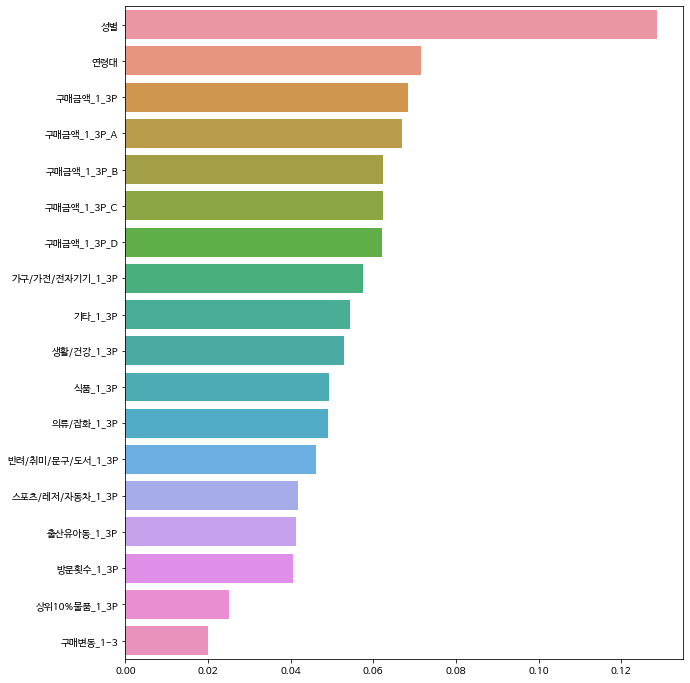

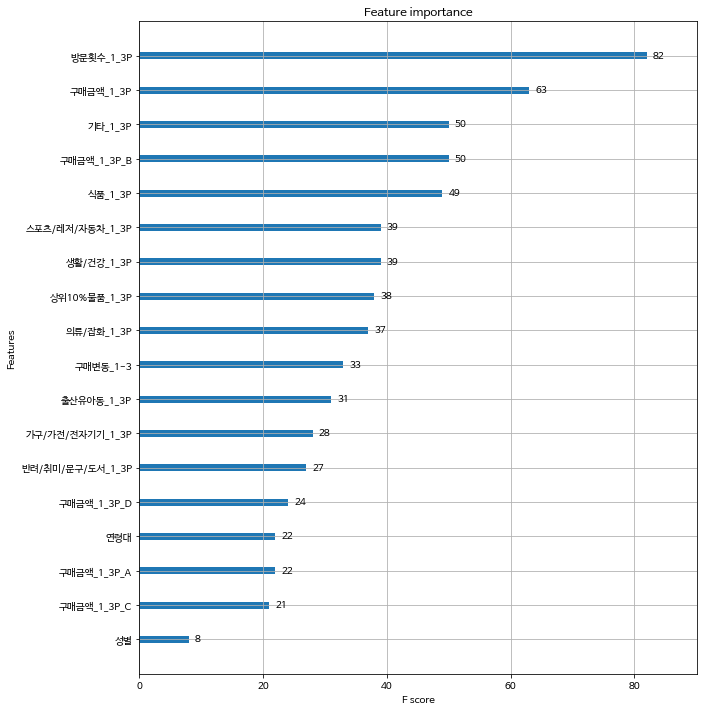

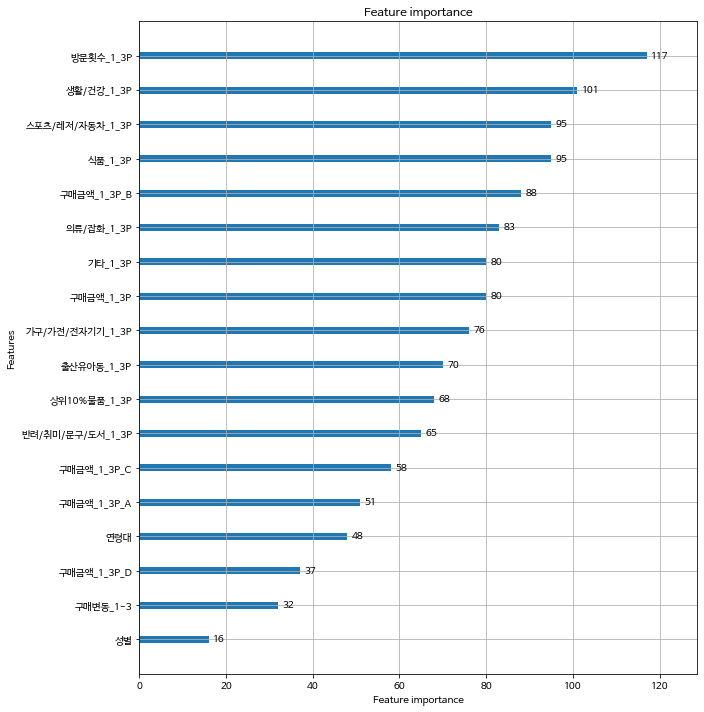

In [9]:
li = ['rf','xgb','lgbm']
for i in li:
  random_modeling(donut2,i)

In [ ]:
import pandas as pd
pizza = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1014/pizza_gap.csv',encoding='cp949',index_col=0)

pizza2 = pizza[['성별','연령대', '구매금액_1_3P', '구매금액_1_3P_A',
       '구매금액_1_3P_B','구매금액_1_3P_C', '구매금액_1_3P_D', '가구/가전/전자기기_1_3P',
       '기타_1_3P', '생활/건강_1_3P','식품_1_3P', '의류/잡화_1_3P',
       '반려/취미/문구/도서_1_3P', '스포츠/레저/자동차_1_3P', '출산유아동_1_3P','방문횟수_1_3P','상위10%물품_1_3P','구매변동_1-4','구매변동_1-3']]

In [8]:
import pandas as pd
donut = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1016/donut1_3개_gap.csv',encoding='cp949',index_col=0)
donut2 = donut[['성별','연령대', '구매금액_1_3P', '구매금액_1_3P_A',
       '구매금액_1_3P_B','구매금액_1_3P_C', '구매금액_1_3P_D', '가구/가전/전자기기_1_3P',
       '기타_1_3P', '생활/건강_1_3P','식품_1_3P', '의류/잡화_1_3P',
       '반려/취미/문구/도서_1_3P', '스포츠/레저/자동차_1_3P', '출산유아동_1_3P','방문횟수_1_3P','상위10%물품_1_3P','구매변동_1-4','구매변동_1-3']]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pizza2

,고객번호,성별,연령대,구매금액_1_3P,구매금액_1_3P_A,구매금액_1_3P_B,구매금액_1_3P_C,구매금액_1_3P_D,가구/가전/전자기기_1_3P,기타_1_3P,생활/건강_1_3P,식품_1_3P,의류/잡화_1_3P,반려/취미/문구/도서_1_3P,스포츠/레저/자동차_1_3P,출산유아동_1_3P,방문횟수_1_3P,상위10%물품_1_3P,구매변동_1-4,구매변동_1-3
0,1,1,5,0,0,0,2,0,5,-2,0,-5,0,0,0,0,1,-1,1,1
1,2,1,5,0,0,0,0,14,0,0,0,-6,0,5,0,1,-1,0,0,0
2,3,1,5,0,-1,0,0,0,0,0,1,0,0,0,0,0,-2,0,1,1
3,4,0,5,-2,-2,1,-5,0,0,3,-1,0,-7,0,-7,2,0,-4,1,1
4,5,1,5,-2,-4,-1,0,3,-3,-5,-8,-3,-1,0,-2,0,-4,-4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19142,19356,0,3,2,0,0,9,0,1,1,5,4,1,0,0,0,5,0,0,0
19143,19357,0,3,3,1,8,1,0,1,3,3,5,2,2,1,5,6,3,0,0
19144,19359,1,4,0,0,1,12,0,0,0,2,1,0,0,0,0,5,1,0,0
19145,19360,0,3,1,1,0,0,0,0,9,1,0,1,0,2,0,2,2,0,0


In [ ]:
li = ['rf','lr','xgb','lgbm']
for i in li:
  grid_modeling(pizza2,i)

rf 정확도 :  0.7337
최적의 파라미터 : {'max_depth': 12, 'min_samples_leaf': 80, 'min_samples_split': 2, 'n_estimators': 215}
최고의 정확도 : 0.7404843895981326
lr 정확도 :  0.7287
최적의 파라미터 : {'C': 10, 'max_iter': 400}
최고의 정확도 : 0.7285369356548118
xgb 정확도 :  0.7407
최적의 파라미터 : {'max_depth': 2, 'min_samples_leaf': 20, 'min_samples_split': 1, 'n_estimators': 200}
최고의 정확도 : 0.738330078406384
lgbm 정확도 :  0.7439
최적의 파라미터 : {'max_depth': 12, 'min_samples_leaf': 20, 'min_samples_split': 1, 'n_estimators': 215}
최고의 정확도 : 0.7252727422825189


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(data):

  vif = []

  data_val = data.values

  for i in range(len(data.columns)):
    vif.append(variance_inflation_factor(data_val, i))

  vif_dataframe = pd.DataFrame()
  vif_dataframe['columns'] = data.columns
  vif_dataframe['VIF'] = vif
  return vif_dataframe

In [ ]:
vif(pizza2.drop(['구매변동_1-4'],axis=1))

,columns,VIF
0,고객번호,2.689067
1,성별,1.214139
2,연령대,3.291486
3,구매금액_1_3P,4.744692
4,구매금액_1_3P_A,3.708734
5,구매금액_1_3P_B,1.648900
6,구매금액_1_3P_C,1.072267
7,구매금액_1_3P_D,1.031218
8,가구/가전/전자기기_1_3P,1.102985
9,기타_1_3P,1.186066


In [ ]:
cust_age = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1012/cust_result.csv',encoding='cp949',index_col=0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
cust_age['연령대'] = le.fit_transform(cust_age['연령대']) 

In [ ]:
result

,고객번호,성별,연령대,구매금액_1,구매금액_2,구매금액_3,구매금액_4,구매금액_1_A,구매금액_1_B,구매금액_1_C,구매금액_1_D,구매금액_2_A,구매금액_2_B,구매금액_2_C,구매금액_2_D,구매금액_3_A,구매금액_3_B,구매금액_3_C,구매금액_3_D,구매금액_4_A,구매금액_4_B,구매금액_4_C,구매금액_4_D,가구/가전/전자기기_1,가구/가전/전자기기_2,가구/가전/전자기기_3,가구/가전/전자기기_4,기타_1,기타_2,기타_3,기타_4,생활/건강_1,생활/건강_2,생활/건강_3,생활/건강_4,식품_1,식품_2,식품_3,식품_4,의류/잡화_1,의류/잡화_2,의류/잡화_3,의류/잡화_4,반려/취미/문구/도서_1,반려/취미/문구/도서_2,반려/취미/문구/도서_3,반려/취미/문구/도서_4,스포츠/레저/자동차_1,스포츠/레저/자동차_2,스포츠/레저/자동차_3,스포츠/레저/자동차_4,출산유아동_1,출산유아동_2,출산유아동_3,출산유아동_4,방문횟수_1,방문횟수_2,방문횟수_3,방문횟수_4,1_중분류갯수,2_중분류갯수,3_중분류갯수,4_중분류갯수,구매변동_1-2,구매변동_2-3,구매변동_1-3,구매변동_1-4
0,1,1,5,19925355,34116312,17898365,13102518,19703210,21800,200345,0,33340300,376140,399872,0,17382750,208136,307479,0,12800890,184900,116728,0,177650,13832340,868250,1937750,1711450,1189900,600500,182600,519620,3582100,523360,712460,4747205,3080192,2901785,1091038,10448770,12431780,12404490,8794020,0,0,0,0,0,0,0,0,0,0,0,0,238,356,312,151,21,34,29,23,0,1,1,1
1,2,1,5,24323230,21922100,27791610,25843820,24292730,30500,0,0,21875650,46450,0,0,27486650,132500,0,172460,25799820,0,0,44000,1952400,727000,1959120,3672560,7457460,4159400,7343410,6041740,1204460,3441370,2312730,1302430,5354030,3679770,2843730,3086330,3908240,7057720,9785910,9962600,30500,30000,84800,0,3949760,2716170,2422820,1706260,466380,110670,1039090,71900,339,271,261,245,19,23,26,21,1,0,0,0
2,3,1,5,851215,1042554,592280,679118,80000,0,771215,0,0,6960,1035594,0,0,0,592280,0,0,0,679118,0,0,26900,0,2300,0,0,0,0,10980,109920,54020,56250,748265,905734,538260,608768,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,348,391,220,232,21,22,16,23,0,1,1,1
3,4,0,5,5042106,4257510,3656937,3737257,4628260,80060,333786,0,3711520,420740,125250,0,3170780,333864,152293,0,2764050,759402,213805,0,0,404000,0,73700,33250,575750,205400,0,161500,242260,129880,134300,1613886,861810,1804827,1479057,2826170,1542440,1385830,1829680,0,0,0,0,402100,613350,62000,220520,0,17900,69000,0,270,172,263,225,24,29,27,24,1,1,1,1
4,5,1,5,5460150,2225730,2934930,2616260,5444150,16000,0,0,2225730,0,0,0,2917380,0,0,17550,2586960,0,0,29300,49900,212300,0,0,897310,223800,477850,90000,415330,57050,5750,100290,3296060,1426380,1988930,1698920,664270,235000,462400,727050,0,0,0,0,63080,71200,0,0,0,0,0,0,377,130,123,89,18,14,12,13,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19142,19356,0,3,170160,1536090,2104968,2434587,0,0,170160,0,29000,17200,1489890,0,0,0,2104968,0,211900,0,2222687,0,0,16000,5490,0,0,48900,10960,36110,3990,117530,262930,303740,166170,1347890,1791588,1894337,0,2970,28000,141400,0,0,0,0,0,2800,0,59000,0,0,0,0,47,381,434,416,13,28,27,27,0,0,0,0
19143,19357,0,3,91950,3281346,3044944,2246675,52700,39250,0,0,1052250,2223486,5610,0,823900,2206144,14900,0,344000,1902675,0,0,0,13750,4600,9900,0,125900,139000,114200,0,112980,137260,31180,48950,1775896,1973334,1469635,43000,848050,581900,308090,0,29280,21250,108370,0,35490,4100,65700,0,340000,183500,139600,12,425,453,342,9,37,34,32,0,1,0,0
19144,19359,1,4,43190,1286327,837240,1092380,0,0,43190,0,0,0,1286327,0,0,4450,832790,0,0,0,1092380,0,0,0,0,0,0,0,0,0,50,93310,100850,57240,43140,1191027,725920,1020170,0,1990,0,2990,0,0,0,0,0,0,0,0,0,0,0,0,17,534,412,369,7,23,22,19,0,1,0,0
19145,19360,0,3,368050,2060040,1412140,886060,0,0,0,368050,10300,58610,0,1991130,290100,0,0,1122040,334600,0,0,551460,0,3050,0,0,244700,1258850,789040,303950,39600,293960,70150,88200,83750,471280,290850,154480,0,13000,187400,334600,0,0,0,0,0,19900,68700,4830,0,0,0,0,41,271,152,80,11,25,21,16,0,1,0,0


In [ ]:
again_df = pd.read_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1013/final_dataset.csv',encoding='cp949',index_col=0)

In [ ]:
again_df.rename(columns={'1_중분류갯수':'중분류갯수_1','2_중분류갯수':'중분류갯수_2','3_중분류갯수':'중분류갯수_3','4_중분류갯수':'중분류갯수_4'},inplace=True)

In [ ]:
again_df.rename(columns={'구매금액_1_A':'구매금액_A_1','구매금액_1_B':'구매금액_B_1','구매금액_1_C':'구매금액_C_1','구매금액_1_D':'구매금액_D_1'},inplace=True)

In [ ]:
again_df.rename(columns={'구매금액_2_A':'구매금액_A_2','구매금액_2_B':'구매금액_B_2','구매금액_2_C':'구매금액_C_2','구매금액_2_D':'구매금액_D_2'},inplace=True)
again_df.rename(columns={'구매금액_3_A':'구매금액_A_3','구매금액_3_B':'구매금액_B_3','구매금액_3_C':'구매금액_C_3','구매금액_3_D':'구매금액_D_3'},inplace=True)
again_df.rename(columns={'구매금액_4_A':'구매금액_A_4','구매금액_4_B':'구매금액_B_4','구매금액_4_C':'구매금액_C_4','구매금액_4_D':'구매금액_D_4'},inplace=True)

In [ ]:
again_df.columns

Index(['고객번호', '성별', '연령대', '구매금액_1', '구매금액_2', '구매금액_3', '구매금액_4', '구매금액_A_1',
       '구매금액_B_1', '구매금액_C_1', '구매금액_D_1', '구매금액_A_2', '구매금액_B_2', '구매금액_C_2',
       '구매금액_D_2', '구매금액_A_3', '구매금액_B_3', '구매금액_C_3', '구매금액_D_3', '구매금액_A_4',
       '구매금액_B_4', '구매금액_C_4', '구매금액_D_4', '가구/가전/전자기기_1', '가구/가전/전자기기_2',
       '가구/가전/전자기기_3', '가구/가전/전자기기_4', '기타_1', '기타_2', '기타_3', '기타_4',
       '생활/건강_1', '생활/건강_2', '생활/건강_3', '생활/건강_4', '식품_1', '식품_2', '식품_3',
       '식품_4', '의류/잡화_1', '의류/잡화_2', '의류/잡화_3', '의류/잡화_4', '반려/취미/문구/도서_1',
       '반려/취미/문구/도서_2', '반려/취미/문구/도서_3', '반려/취미/문구/도서_4', '스포츠/레저/자동차_1',
       '스포츠/레저/자동차_2', '스포츠/레저/자동차_3', '스포츠/레저/자동차_4', '출산유아동_1', '출산유아동_2',
       '출산유아동_3', '출산유아동_4', '방문횟수_1', '방문횟수_2', '방문횟수_3', '방문횟수_4', '중분류갯수_1',
       '중분류갯수_2', '중분류갯수_3', '중분류갯수_4'],
      dtype='object')

In [ ]:
def pazemaker(data):
  if data < 0:
    result = 2
  elif data > 0:
    result = 0
  else :
    result = 1
  return result

In [ ]:
again_df.to_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1015/again_dataset.csv',encoding='cp949')

In [ ]:
again_df2 = pd.DataFrame()

In [ ]:
li = ['구매금액','구매금액_A','구매금액_B','구매금액_C','구매금액_D','가구/가전/전자기기','기타','생활/건강','식품','의류/잡화','반려/취미/문구/도서','스포츠/레저/자동차','출산유아동','방문횟수','중분류갯수']
for i in li:  
  again_df2[f'{i}_1-2P'] = again_df[f'{i}_2'] - again_df[f'{i}_1']
  again_df2[f'{i}_1-3P'] = again_df[f'{i}_3'] - again_df[f'{i}_1']
  again_df2[f'{i}_2-3P'] = again_df[f'{i}_3'] - again_df[f'{i}_2']

In [ ]:
again_df2['고객번호'] = again_df['고객번호']

In [ ]:
again_df2 = again_df2[['고객번호','구매금액_1-2P', '구매금액_1-3P', '구매금액_2-3P', '구매금액_A_1-2P', '구매금액_A_1-3P',
       '구매금액_A_2-3P', '구매금액_B_1-2P', '구매금액_B_1-3P', '구매금액_B_2-3P',
       '구매금액_C_1-2P', '구매금액_C_1-3P', '구매금액_C_2-3P', '구매금액_D_1-2P',
       '구매금액_D_1-3P', '구매금액_D_2-3P', '가구/가전/전자기기_1-2P', '가구/가전/전자기기_1-3P',
       '가구/가전/전자기기_2-3P', '기타_1-2P', '기타_1-3P', '기타_2-3P', '생활/건강_1-2P',
       '생활/건강_1-3P', '생활/건강_2-3P', '식품_1-2P', '식품_1-3P', '식품_2-3P',
       '의류/잡화_1-2P', '의류/잡화_1-3P', '의류/잡화_2-3P', '반려/취미/문구/도서_1-2P',
       '반려/취미/문구/도서_1-3P', '반려/취미/문구/도서_2-3P', '스포츠/레저/자동차_1-2P',
       '스포츠/레저/자동차_1-3P', '스포츠/레저/자동차_2-3P', '출산유아동_1-2P', '출산유아동_1-3P',
       '출산유아동_2-3P', '방문횟수_1-2P', '방문횟수_1-3P', '방문횟수_2-3P', '중분류갯수_1-2P',
       '중분류갯수_1-3P', '중분류갯수_2-3P']]

In [ ]:
again_df2.to_csv('/content/drive/MyDrive/LMEMBERS 프로젝트(1차)/dataset/1015/again_dataset2.csv',encoding='cp949')